In [53]:
import tensorflow.keras as k
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Activation,Conv2DTranspose
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [76]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)
# print(y_train.shape)
# print(np.resize(x_train,(-1,28,28)).shape)

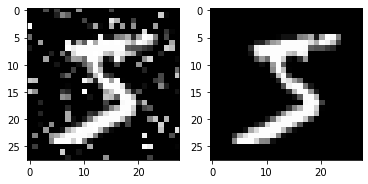

In [77]:
def add_noise(data):
  filter=(np.random.standard_normal([28, 28]) * 255).astype(np.uint8)
  filter_tune=[]
  for i in range(28):
    tmp1=[]
    for j in range(28):
      tmp1.append(np.random.choice([0,0,0,0,1]))
    filter_tune.append(tmp1)
  filter_tune=np.array(filter_tune)
  filter=filter*filter_tune
  filter=np.expand_dims(filter,axis=-1)
  data=data+filter
  data=np.clip(data,0.0,255.)
  return data

x_train_noise=add_noise(x_train)
x_test_noise=add_noise(x_test)
plt.subplot(121)
plt.imshow(np.resize(x_train_noise[0],(28,28)),cmap='gray')
plt.subplot(122)
plt.imshow(np.resize(x_train[0],(28,28)),cmap='gray')

In [115]:
# creating the model

# encoder
model=Sequential()
model.add(Conv2D(16,(3,3),strides=2,padding='same',input_shape=x_train.shape[1:]))
model.add(Conv2D(8,(3,3),strides=2,padding='same',activation='relu'))
model.add(Conv2D(8,(3,3),strides=1,padding='same',activation='relu'))   # bottelneck
model.add(Conv2D(4,(3,3),strides=1,padding='same',activation='relu'))
# decoder
model.add(Conv2DTranspose(8,(3,3),strides=1,padding='same',activation='relu'))
model.add(Conv2DTranspose(16,(3,3),strides=2,padding='same',activation='relu'))
model.add(Conv2DTranspose(1,(3,3),strides=2,padding='same',activation='relu'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 7, 7, 4)           292       
_________________________________________________________________
conv2d_transpose_19 (Conv2DT (None, 7, 7, 8)           296       
_________________________________________________________________
conv2d_transpose_20 (Conv2DT (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_21 (Conv2DT (None, 28, 28, 1)        

In [116]:
# model.compile('adam',loss='mse',metrics=['mse'])

In [117]:
# history=model.fit(x_train_noise,x_train,epochs=10,validation_split=.1)

In [118]:
model.compile('rmsprop',loss='mae',metrics=['accuracy'])
history=model.fit(x_train_noise,x_train,epochs=10,validation_split=.1)

Epoch 1/10
1688/1688 [==============================] - 11s 7ms/step - loss: 20.1099 - accuracy: 0.7897 - val_loss: 13.4765 - val_accuracy: 0.7862
Epoch 2/10
1688/1688 [==============================] - 11s 6ms/step - loss: 8.6622 - accuracy: 0.7921 - val_loss: 8.7785 - val_accuracy: 0.7911
Epoch 3/10
1688/1688 [==============================] - 11s 6ms/step - loss: 7.5510 - accuracy: 0.7970 - val_loss: 7.0024 - val_accuracy: 0.7992
Epoch 4/10
1688/1688 [==============================] - 11s 6ms/step - loss: 7.0041 - accuracy: 0.7991 - val_loss: 6.5620 - val_accuracy: 0.8017
Epoch 5/10
1688/1688 [==============================] - 11s 6ms/step - loss: 6.6150 - accuracy: 0.8003 - val_loss: 6.2331 - val_accuracy: 0.8038
Epoch 6/10
1688/1688 [==============================] - 11s 6ms/step - loss: 6.2964 - accuracy: 0.8010 - val_loss: 6.4078 - val_accuracy: 0.8062
Epoch 7/10
1688/1688 [==============================] - 11s 7ms/step - loss: 6.0459 - accuracy: 0.8015 - val_loss: 5.8805 - val_

In [119]:
x_pred=model.predict(x_test)
x_pred=np.clip(x_pred,0.0,255.)

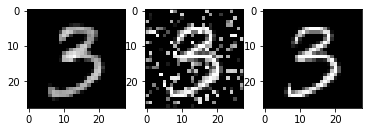

In [124]:
n=2020
plt.subplot(131)
plt.imshow(np.resize(x_pred[n],(28,28)),cmap='gray')
plt.subplot(132)
plt.imshow(np.resize(x_test_noise[n],(28,28)),cmap='gray')
plt.subplot(133)
plt.imshow(np.resize(x_test[n],(28,28)),cmap='gray')

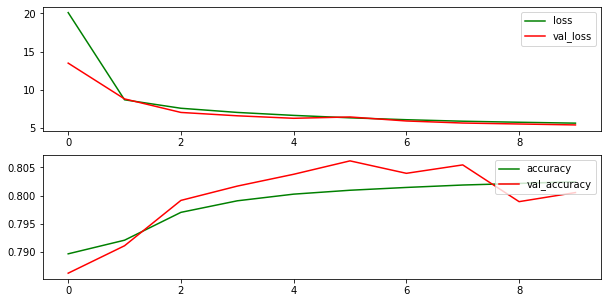

In [121]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(range(10),history.history['loss'],'g',label='loss')
plt.plot(range(10),history.history['val_loss'],'r',label='val_loss')
plt.legend(loc='upper right')

plt.subplot(212)
plt.plot(range(10),history.history['accuracy'],'g',label='accuracy')
plt.plot(range(10),history.history['val_accuracy'],'r',label='val_accuracy')
plt.legend(loc='upper right')